In [11]:
import numpy as np 
import math 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
from scipy import stats
import scipy 
plt.rcParams["figure.figsize"] = (13,10)



window = 250
df = pd.read_csv("stock_prices_SP500_2007_2021.csv")
df.set_index("time", inplace = True)
#loss 
df = -np.log(df/df.shift(1)) 
na = (df.isnull().sum(axis = 0) > 300)
todrop = list(na.loc[na == True].index)
df.drop(columns = todrop, inplace = True)
date = df.index.to_numpy()
df.fillna(0, inplace = True)
df_n = df.to_numpy()
n_col = df_n.shape[1]
window = 250
#cor = df.corr().to_numpy()
#ind = np.diag(np.ones(cor.shape[0]))



In [12]:

def calculate_shrunked_cov(theta=0.5):
    covariances = []
    for j in range(0, df_n.shape[0]-window):
        x = df_n[j:j+window,:]
        covariance = np.cov(x.T)
        correlation = np.diag(covariance)**(-1) * covariance
        shrunked = (1-theta)*correlation + (theta)*np.identity(covariance.shape[0])
        covariances.append(np.diag(covariance) * shrunked)
    return covariances
  
def generate_q(seed, dim=580):
    np.random.seed(seed)
    q = np.random.random((dim,1))*10
    return q

q =generate_q(seed = 1, dim = df_n.shape[1])
quantile = scipy.stats.norm.ppf(0.95)

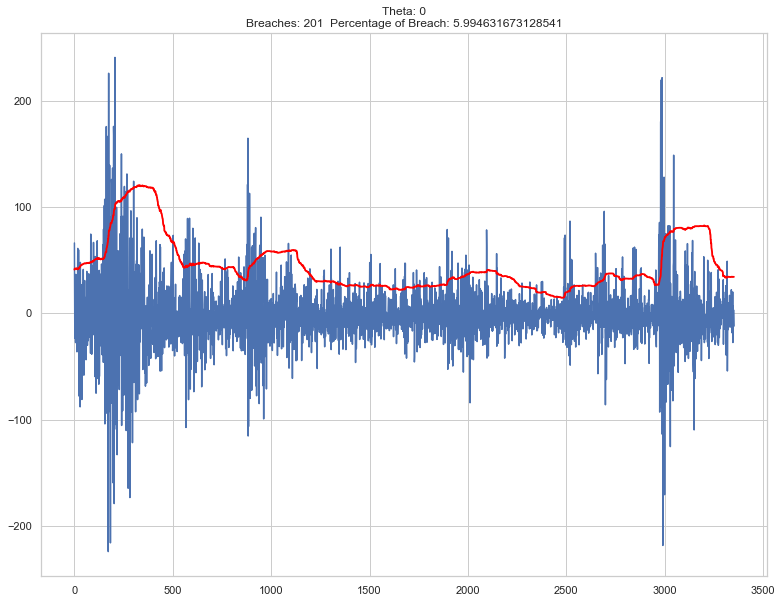

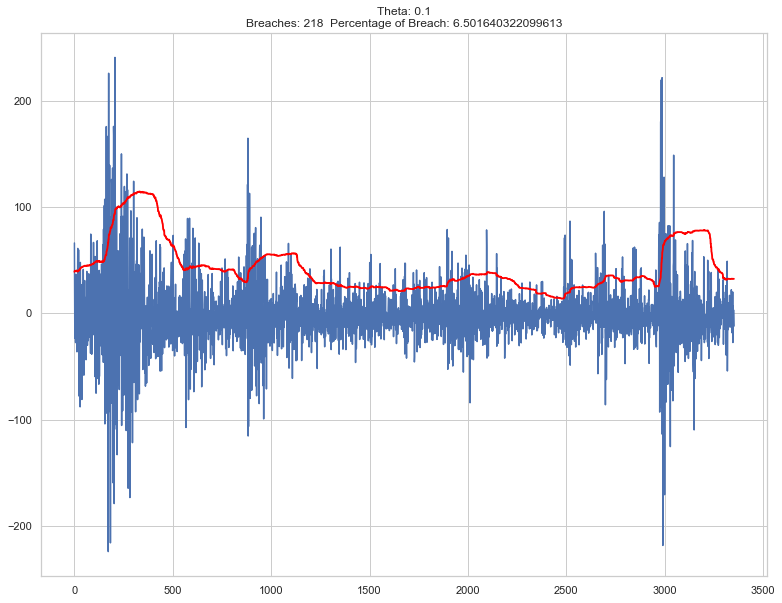

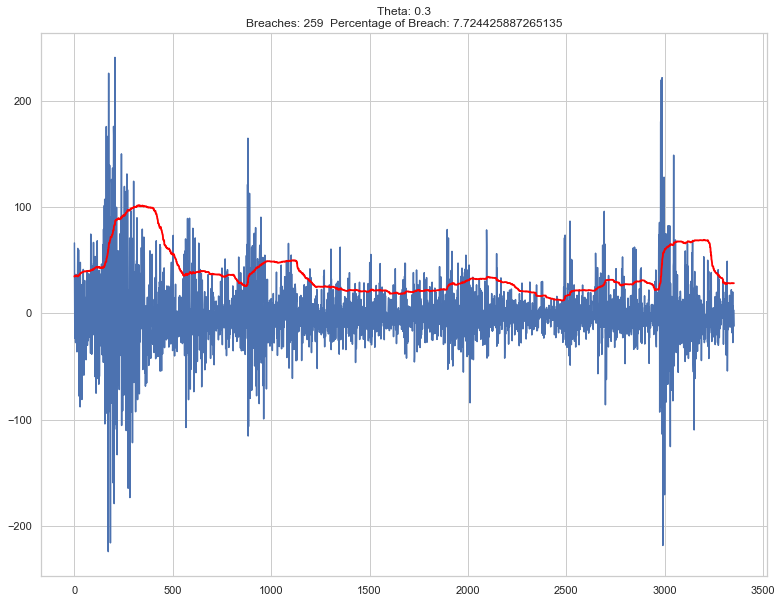

KeyboardInterrupt: 

In [13]:
for t in [0,0.1,0.3,0.5]:
    cov_nump = np.array(calculate_shrunked_cov(theta = t))
    Variance_portfolio = np.squeeze(q.T @ cov_nump @ q)
    portfolio =  df_n @ q
    
    mean_rolling = [np.mean(portfolio[j:j+window]) for j in range(0, df_n.shape[0]-window)] 

    portfolio = np.squeeze(portfolio[250:])
    var = Variance_portfolio**0.5 * quantile + np.array(mean_rolling)

    exception = (portfolio > var).sum()/len(portfolio) * 100
    plt.plot(portfolio)
    plt.plot(var, color = "red", linewidth = 1.85)
    plt.title(f"Theta: {t}\nBreaches: {(portfolio > var).sum()}  Percentage of Breach: {exception}")
    plt.show()